# Probando la API de OpenAI

En este cuaderno vamos a ver cómo podemos interactuar mediante Python con los modelos disponibilizados mediante API's por OpenAI. En este caso veremos un ejemplo de interacción con GPT-4 y otro con Dall-e  pero si quisiéramos interactuar con otros modelos el procedimiento sería prácticamente análogo.

El primer paso sería generar una clave para la API del modelo que se desea utilizar, en este caso GPT4. En caso de que aun no hayas generado la clave puedes seguir las explicaciones provistas en el vídeo de esta clase.

Una vez tenemos la clave generada comenzamos importando el módulo que OpenAI ha construido explícitamente para facilitar la interacción con sus modelos. En caso de trabajar con un entorno en el que no se haya instalado previamente el módulo comenzaremos por su instalación:

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


Una vez instalado el modelo procedemos a importarlo para utilizarlo:

In [2]:
import openai

Lo siguiente que vamos a hacer es almacenar nuestra clave API en una variable de entorno para utilizarla cada vez que hagamos una llamada a un modelo, para ello:

In [3]:
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-JgnyPrVpPr4xoz1FrPxiT3BlbkFJcIB6dz6ptu7gA5UifDsQ"

Ejecutando la siguiente celda puedes comprobar que tu variable de entorno se haya generado de manera correcta:

In [4]:
print(os.environ["OPENAI_API_KEY"])

sk-proj-JgnyPrVpPr4xoz1FrPxiT3BlbkFJcIB6dz6ptu7gA5UifDsQ


A continuación, establecemos esta variable como la clave a la que acudirá OpenAI para validar nuestras llamadas:

In [5]:
openai.api_key = os.environ["OPENAI_API_KEY"]

Inicializamos el cliente de OpenAI para hacer llamadas:

In [6]:
from openai import OpenAI
client = OpenAI()

Ya estamos listos para hacer nuestra primera llamada al modelo:

In [7]:
respuesta_GPT = client.chat.completions.create(
  model="gpt-4-turbo-preview",
  messages=[
    {"role": "system", "content": "Eres un asistente que ayuda a los usuarios"},
    {"role": "user", "content": "¿Cuál es el planeta más cálido del sistema solar?"}
  ]
)

In [8]:
print(respuesta_GPT)

ChatCompletion(id='chatcmpl-9X9n20xA3kXjXRpHWrWrYxOGPhuzG', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='El planeta más cálido del sistema solar es Venus. A pesar de que Mercurio es el más cercano al Sol, la atmósfera de Venus, rica en dióxido de carbono y con nubes de ácido sulfúrico, atrapa el calor de manera extremadamente eficiente a través del efecto invernadero, elevando las temperaturas superficiales a un promedio de alrededor de 465 grados Celsius (869 grados Fahrenheit). Este fenómeno hace de Venus el planeta más caliente de nuestro sistema solar.', role='assistant', function_call=None, tool_calls=None))], created=1717689484, model='gpt-4-0125-preview', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=121, prompt_tokens=36, total_tokens=157))


En tan solo unas pocas líneas de código ya hemos interactuado desde una aplicación creada por nosotros (este pequeño cuaderno) con el modelo GPT-4.

Como podemos observar la respuesta del modelo no es especialmente "amigable" por lo que debemos añadir pequeñas funciones que nos permitan extraer la información deseada de una manera comprensible para el usuario.

Observamos que la respuesta a nuestra cuestión se almacena en el contenido del mensaje:

In [9]:
print(respuesta_GPT.choices[0].message.content)

El planeta más cálido del sistema solar es Venus. A pesar de que Mercurio es el más cercano al Sol, la atmósfera de Venus, rica en dióxido de carbono y con nubes de ácido sulfúrico, atrapa el calor de manera extremadamente eficiente a través del efecto invernadero, elevando las temperaturas superficiales a un promedio de alrededor de 465 grados Celsius (869 grados Fahrenheit). Este fenómeno hace de Venus el planeta más caliente de nuestro sistema solar.


pero además contamos con otra información relevante en la respuesta.

#### Motivo de finalización

El atributo `finish_reason` nos indica el motivo por el que ha terminado la llamada a la API y puede tomar los siguientes valores:

* stop. El modelo ha terminado con éxito de devolver su respuesta
* length. La respuesta excede el número de tokens permitido.
* function_call. El modelo ha decidido llamar a una función.
* content_filter. El contenido ha sido omitido porque es detectado como negativo por nuestros filtros de contenido.
* null. La respuesta está incompleta o aún en proceso.

In [10]:
print(respuesta_GPT.choices[0].finish_reason)

stop


Otro parámetro interesante es el uso

#### Uso

El atributo `usage` nos indica el uso del modelo:

* completion_tokens indica cuántos tokens ha utilizado el modelo para responder.
* prompt_tokens indica cuántos tokens han sido utilizados en nuestra consulta.
* total_tokens indica cuántos tokens se han utilizado en total (la facturación se genera en función de esta cifra).

In [11]:
print(respuesta_GPT.usage)

CompletionUsage(completion_tokens=121, prompt_tokens=36, total_tokens=157)


Vamos a construir una función que nos permite hacer las respuestas de GPT-4 más limpias y comprensibles:

In [12]:
def procesa_motivo_fin(stop_GPT):
  if stop_GPT == "stop":
    return "La petición acaba de manera correcta"
  else:
    return "Ha habido un problema en la petición. El código de salida ha sido" + stop_GPT

In [13]:
from datetime import datetime
def procesamiento_respuesta_GPT(respuesta_GPT_sin_procesar):
  respuesta_procesada = {} # generamos un diccionario vacío en el que iremos devolviendo nuestras respuestas
  respuesta_procesada["mensaje"] = respuesta_GPT_sin_procesar.choices[0].message.content
  respuesta_procesada["fecha"] = "La petición se realizó a fecha " + datetime.fromtimestamp(respuesta_GPT_sin_procesar.created).strftime("%H:%M:%S, %d/%m/%Y")
  respuesta_procesada["uso"] = "La petición ha consumido un total de " + str(respuesta_GPT_sin_procesar.usage.total_tokens) + " tokens."
  respuesta_procesada["fin"] = procesa_motivo_fin(respuesta_GPT_sin_procesar.choices[0].finish_reason)
  return respuesta_procesada


In [14]:
respuesta_GPT_procesada = procesamiento_respuesta_GPT(respuesta_GPT)
respuesta_GPT_procesada

{'mensaje': 'El planeta más cálido del sistema solar es Venus. A pesar de que Mercurio es el más cercano al Sol, la atmósfera de Venus, rica en dióxido de carbono y con nubes de ácido sulfúrico, atrapa el calor de manera extremadamente eficiente a través del efecto invernadero, elevando las temperaturas superficiales a un promedio de alrededor de 465 grados Celsius (869 grados Fahrenheit). Este fenómeno hace de Venus el planeta más caliente de nuestro sistema solar.',
 'fecha': 'La petición se realizó a fecha 15:58:04, 06/06/2024',
 'uso': 'La petición ha consumido un total de 157 tokens.',
 'fin': 'La petición acaba de manera correcta'}

Hasta aquí hemos visto cómo con unas pocas líneas de código podemos recurrir desde nuestra propia aplicación al conocimiento de GPT-4.

Veámos ahora un ejemplo un poco más complejo.

## Dall-e

En esta segunda sección vamos a aprender a hacer una llamada a la API de Dall-e. Esta llamada será algo más compleja por la dificultad que supone el procesamiento de imágenes frente al procesamiento de texto.

El proceso es similar aunque en este caso añadiremos argumentos específicos para la generación de imágenes:

In [15]:
response_dall_e = client.images.generate(
  model="dall-e-3",
  prompt="Una persona programando delante de un ordenador",
  size="1024x1024",
  quality="standard",
  n=1,
)

__Nota.__ Para más información sobre los parámetros se puede consultar la [documentación de la función](https://platform.openai.com/docs/api-reference/images)

In [16]:
response_dall_e

ImagesResponse(created=1717689765, data=[Image(b64_json=None, revised_prompt="A Middle-Eastern female programmer engrossed in her work, sitting with full concentration at her computer desk. The screen is filled with lines of code, keyboard keys gently lit by the screen's light. The room is softly illuminated, bringing focus to her work, with technological gadgets spread around. Her glasses reflect the texts from the screen, hinting at the complexity of the task she is tackling.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-WOm0zhqsKhNalL7gcKGjI4nt/user-xYyyJMUIinUtmKZjCg0nWWMV/img-7msPMP0WuL8cTfUvgRwmU3hp.png?st=2024-06-06T15%3A02%3A45Z&se=2024-06-06T17%3A02%3A45Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-06-05T17%3A18%3A56Z&ske=2024-06-06T17%3A18%3A56Z&sks=b&skv=2023-11-03&sig=3HLC/lZ1RIt8HgWUX47HZc9A4tqumyAusfN%2BsJeVTrQ%3D')])

En este caso la respuesta incluye una URL que nos conduce a la imagen que se ha generado por el modelo. De nuevo vamos a ver cómo podemos hacer esta respuesta un poco más legible para el usuario:

In [17]:
def procesamiento_respuesta_dall_e(respuesta_dall_e_sin_procesar):
  respuesta_procesada = {} # generamos un diccionario vacío en el que iremos devolviendo nuestras respuestas
  respuesta_procesada["imagen"] = response_dall_e.data[0].url #almacenamos la URL en la que se encuetra la imagen
  respuesta_procesada["fecha"] = "La petición se realizó a fecha " + datetime.fromtimestamp(respuesta_dall_e_sin_procesar.created).strftime("%H:%M:%S, %d/%m/%Y")
  respuesta_procesada["prompt_revisado"] = "El prompt revisado ha sido: " + response_dall_e.data[0].revised_prompt
  return respuesta_procesada

In [18]:
respuesta_procesada_dall_e = procesamiento_respuesta_dall_e(response_dall_e)
respuesta_procesada_dall_e

{'imagen': 'https://oaidalleapiprodscus.blob.core.windows.net/private/org-WOm0zhqsKhNalL7gcKGjI4nt/user-xYyyJMUIinUtmKZjCg0nWWMV/img-7msPMP0WuL8cTfUvgRwmU3hp.png?st=2024-06-06T15%3A02%3A45Z&se=2024-06-06T17%3A02%3A45Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-06-05T17%3A18%3A56Z&ske=2024-06-06T17%3A18%3A56Z&sks=b&skv=2023-11-03&sig=3HLC/lZ1RIt8HgWUX47HZc9A4tqumyAusfN%2BsJeVTrQ%3D',
 'fecha': 'La petición se realizó a fecha 16:02:45, 06/06/2024',
 'prompt_revisado': "El prompt revisado ha sido: A Middle-Eastern female programmer engrossed in her work, sitting with full concentration at her computer desk. The screen is filled with lines of code, keyboard keys gently lit by the screen's light. The room is softly illuminated, bringing focus to her work, with technological gadgets spread around. Her glasses reflect the texts from the screen, hinting at the complexity of the task she is ta

Como puedes observar y para lograr resultados más correctos Dall-e revisa nuestro prompt y lo completa de manera que se obtengan imágenes más precisas. Siempre podemos comprobar y revisar el prompt enviada para asegurarnos de que se adecúa a nuestras necesidades y en caso contrario hacer nuestro prompt más específico.

Por último podemos hacer que esto sea visible en nuestro cuaderno directamente para ello construimos esta pequeña función para visualizar la imagen:

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from io import BytesIO

def mostrar_imagen_desde_url(url):
    try:
        response = requests.get(url) #lanzamos la petición a la URL
        if response.status_code == 200: # el código 200 indica que la petición ha sido aceptada
            img = mpimg.imread(BytesIO(response.content)) #descarga los bytes de la imagen
            plt.imshow(img) # genera el espacio para la imagen
            plt.axis('off')  # Para ocultar los ejes
            plt.show()
        else:
            print("No se pudo obtener la imagen. Código de estado:", response.status_code)
    except Exception as e:
        print("Error al procesar la URL:", e)


Y tras ello ya podemos construir nuestra función:

In [20]:
def dall_e_en_cuaderno(respuesta_procesada_dall_e):
  mostrar_imagen_desde_url(respuesta_procesada_dall_e["imagen"])
  print(respuesta_procesada_dall_e["prompt_revisado"])


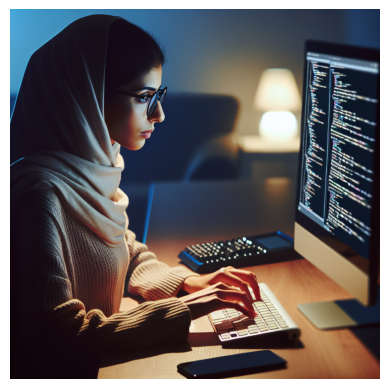

El prompt revisado ha sido: A Middle-Eastern female programmer engrossed in her work, sitting with full concentration at her computer desk. The screen is filled with lines of code, keyboard keys gently lit by the screen's light. The room is softly illuminated, bringing focus to her work, with technological gadgets spread around. Her glasses reflect the texts from the screen, hinting at the complexity of the task she is tackling.


In [21]:
dall_e_en_cuaderno(respuesta_procesada_dall_e)

#### Fin primeros pasos con la API de OpenAI

Con esto hemos llegado al final de esta primera parte en la que hemos realizado nuestras primeras llamadas a distintas API's de OpenAI como GPT-4 o Dall-e. Os animo a probar estas llamadas con vuestras propias claves modificando los prompts o los modelos a los que estáis llamando.

## API de OpenAI para moderación

La API de OpenAI incluye un modelo de moderación de contenido capaz de detectar tanto en los prompts como en las respuestas de los mismos por parte del modelo contenidos indeseados (discriminación, odio, acoso...). En ocasiones, puede ser útil moderar las entradas para evitar comportamientos o comentarios indeseados tanto por parte del modelo como de los usuarios.

Veamos un ejemplo:

In [22]:
respuesta_moderation = client.moderations.create(input="Eres un auténtico idiota.")

In [23]:
respuesta_moderation

ModerationCreateResponse(id='modr-9XA45LWCKENiwAJIrlGdPXgvitzq5', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=True, harassment_threatening=False, hate=False, hate_threatening=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_scores=CategoryScores(harassment=0.9707235097885132, harassment_threatening=9.036743904289324e-07, hate=0.12308058887720108, hate_threatening=2.0313796866844314e-08, self_harm=4.458863429590565e-07, self_harm_instructions=2.793741238349412e-08, self_harm_intent=2.0530093181037046e-08, sexual=2.8057086183252977e-06, sexual_minors=8.722368605162956e-09, violence=0.0002314047160325572, violence_graphic=4.6216950977395754e-07, self-harm=4.458863429590565

En la respuesta de la API tenemos el atributo `flagged` que nos indica si el contenido es potencialmente lesivo:

In [24]:
respuesta_moderation.results[0].flagged

True

Además podemos utililizar las categorías para comprender qué tipo de amenaza está percibiendo el modelo:

In [25]:
for riesgo in respuesta_moderation.results[0].categories:
  if riesgo[1]:
    print(riesgo)

('harassment', True)


#### Fin primeros pasos con la API de Moderación de OpenAI

Con esto hemos llegado al final de este cuaderno en el que hemos realizado distintas llamadas a modelos de OpenAI y hemos aprendido a hacer su salida más comprensible y utilizable. Os animo a probar estas llamadas con vuestras propias claves modificando los prompts o los modelos a los que estáis llamando y observando los puntos fuertes y débiles de cada uno de los modelos (comprensión de ironía, frases hechas, sutilezas...).